
# Project: Investigating TMDb Movie Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    This project implements investigating TMDb movie dataset which consists of 10866 columns and 21 rows. This dataset contains details about a collection of movies that were released from 1960 till 2015. In our project, we will be analyzing the given data to come up with data general statistics and visualization.
    
    The investigated questions are:
    
        - Which Movie has the highest Revenue?
        - Which Movie has the lowest Revenue?
        - What is the most profitable movie?
        - what is the least profitable movie?
        - what are the most popular cinematic genres?
        - which year has the highest number of movie releases?
        - what is the kind of correlation between the two variables 'popularity' vs 'revenue'?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, we will load the data, check for cleanliness, and then trim and clean our dataset for analysis. I showed the first five headlines of the dataset, the columns names, the shape of the data, the number of columns and rows, and some general statistics. After extracting the types of our data, I changed the release date column into the DateTime type instead of an object/string. Finally, the last thing in this phase is getting rid of any null data and duplicates.

### General Properties

In [3]:
data = pd.read_csv('tmdb-movies.csv')
data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [28]:
print(list(data.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [29]:
print(data.shape)

(10866, 21)


### Data Cleaning: General Statistics

In [30]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning: Data Types

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [ ]:
###changing the release date column into the DateTime type instead of an object/string.

In [32]:
data['release_date'] = pd.to_datetime(data['release_date'], infer_datetime_format=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

### Data Cleaning: Removing Null Values

In [33]:
data.isnull(). any(). sum()

9

In [34]:
data.isnull(). any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [ ]:
###validating null values are removed.

In [35]:
data = data.dropna(how='any',axis=0)
data.isnull(). any()

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

### Data Cleaning: Removing Duplicated Values

In [5]:
sum(data.duplicated())

1

In [6]:
data.drop_duplicates(inplace = True)
print(data.shape)

(10865, 21)


<a id='eda'></a>
## Exploratory Data Analysis

 Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Data Overview

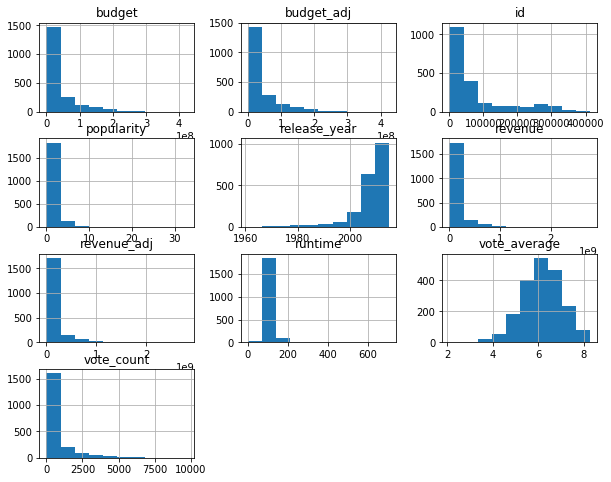

In [16]:
data.hist(figsize= (10,8));

In [17]:
data.count()

id                      1992
imdb_id                 1992
popularity              1992
budget                  1992
revenue                 1992
original_title          1992
cast                    1992
homepage                1992
director                1992
tagline                 1992
keywords                1992
overview                1992
runtime                 1992
genres                  1992
production_companies    1992
release_date            1992
vote_count              1992
vote_average            1992
release_year            1992
budget_adj              1992
revenue_adj             1992
dtype: int64

### Which Movie has the highest & Lowest Revenue?

In [18]:
hightest_movie_revenue = data["revenue"].max()
print(hightest_movie_revenue)

2781505847


In [19]:
print(data.original_title[data['revenue'] == data['revenue'].max()])

1386    Avatar
Name: original_title, dtype: object


In [5]:
lowest_movie_revenue = data["revenue"].min()
print(lowest_movie_revenue)

0


In [1]:
###the zero value in 'revenue' is not considered as an outlier, therefore it is not removed as dripping it would affect the accuracy of the analysis.

In [6]:
print(data.original_title[data['revenue'] == data['revenue'].min()])

48                                              Wild Card
67                                               Survivor
74                                 Mythica: The Darkspore
75                         Me and Earl and the Dying Girl
92                               Mythica: The Necromancer
93                                                   Vice
100                                          Frozen Fever
101                                             High-Rise
103                              Spooks: The Greater Good
116                    The Scorpion King: The Lost Throne
122                                                Everly
133                                     Louder Than Bombs
140                   Dragonheart 3: The Sorcerer's Curse
143                                  Brothers of the Wind
145                                         Bone Tomahawk
147                                        Pawn Sacrifice
149                                              Momentum
151           

### Exploratory Data : Creating New Coulmn 'profit'

In [50]:
data['profit'] = data['revenue'] -  data['budget']
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


### Exploratory Data : Highest & Lowest Profiable Movies using the new created column 'profit'.

In [21]:
hightest_movie_profit = data['profit'].max()
print(hightest_movie_profit)

2544505847


In [22]:
print(data.original_title[data['profit'] == data['profit'].max()])

1386    Avatar
Name: original_title, dtype: object


In [23]:
lowest_movie_profit = data['profit'].min()
print(lowest_movie_profit)

-413912431


In [24]:
print(data.original_title[data['profit'] == data['profit'].min()])

2244    The Warrior's Way
Name: original_title, dtype: object


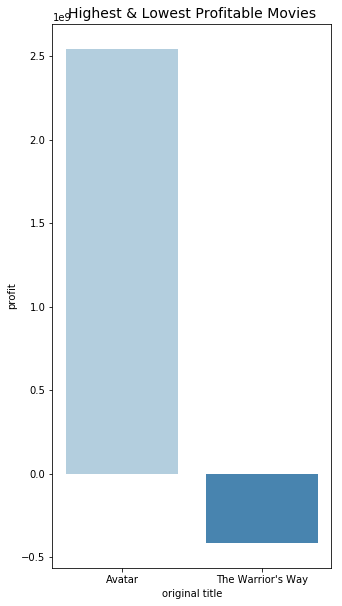

In [51]:
#setting up the figure size and labels as the follwoing:
plt.figure(figsize=(5,10))

#making a list of comparison between the highest profitable movie and the lowest.
dd = data[(data.profit==data['profit'].max())|(data.profit==data['profit'].min())]

#formating the barplot by adding color, title, xlabel, ylabel.
sns.barplot(dd['original_title'], dd['profit'], palette = 'Blues')
plt.title('Highest & Lowest Profitable Movies', fontsize = 14)
plt.xlabel('original title')
plt.ylabel('profit')
plt.show()

In [13]:
### The above barplot shows that the most profitable movie is Avatar and the least profitable movie is The Warrior’s Way.

### Exploratory Data :   Most Popular Genres

In [14]:
dg = data['genres'].str.get_dummies(sep='|')
dg1 = dg.sum().reset_index()

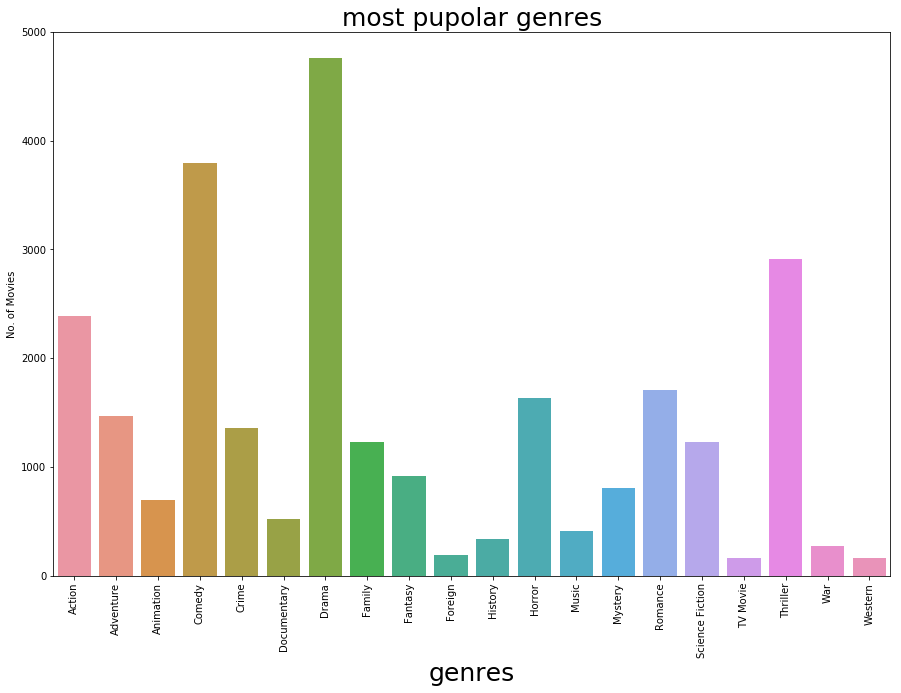

In [20]:
#setting up the figure size and labels as the follwoing:
plt.figure(figsize=(15,10))

#formating the barplot by adding color, title, xlabel, ylabel.
sns.barplot(x=dg.columns, y=dg.sum(), data = dg1)
plt.title('most pupolar genres', fontsize = 25)
plt.xlabel('genres', fontsize = 25)
plt.ylabel('No. of Movies')
plt.xticks(rotation = 90)
plt.show()

In [16]:
### The above barplot shows that the most common genres are Drama, Comedy, Thriller followed by Action.

### Exploratory Data :   Years with the Most Released Movies

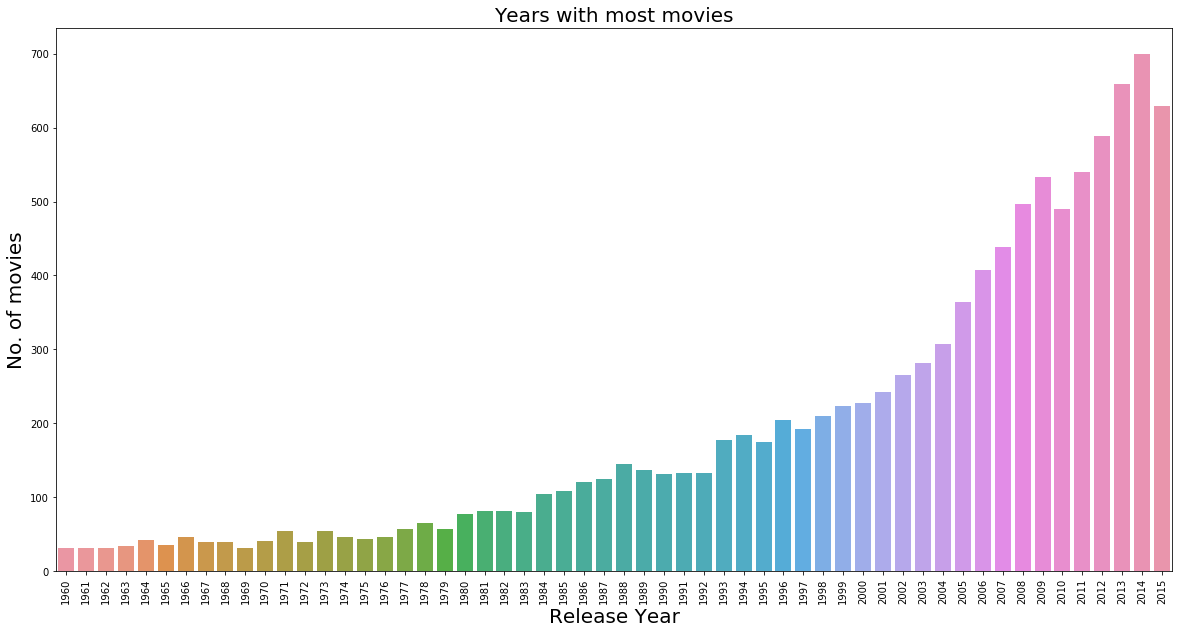

In [17]:
#setting up the figure size and labels as the follwoing:
plt.figure(figsize=(20,10))

#formating the barplot by adding color, title, xlabel, ylabel.
sns.countplot(data['release_year'])
plt.title('Years with most movies', fontsize = 20)
plt.xlabel('Release Year', fontsize = 20)
plt.ylabel('No. of movies', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [18]:
### The above barplot shows that the highest year with movie releases is in 2014 with almost 700 movies.

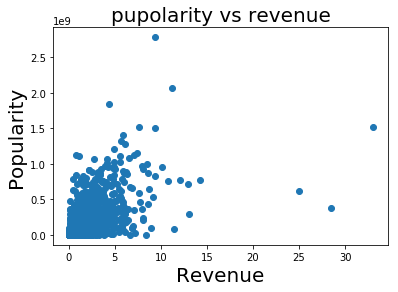

In [5]:
#setting up the figure size and labels as the follwoing:
plt.scatter(data['popularity'], data['revenue'])

#formating the barplot by adding color, title, xlabel, ylabel.
plt.title('pupolarity vs revenue', fontsize = 20)
plt.xlabel('Revenue', fontsize = 20)
plt.ylabel('Popularity', fontsize = 20)
plt.show()

In [10]:
###the above scatter plot shows that both popularity and revenue have a positive correlation which means that the more popular the movie, the more the revenue.

<a id='conclusions'></a>
## Conclusions

    After investigating the previous dataset, we can conclude the following:
    
       -The highest revenue movie is avatar by 2781505847 $.
       -The lowest revenue movie is wild card by 0 $.
       -The highest profitable movie is avatar by 2544505847 $.
       -The lowest profitable movie is worrier’s way by -413912431 $.
       -The genre of drama is the most popular one, followed by action, comedy and thriller.
       -Maximum number of movies releases is in 2014.
       -popularity and revenue have a positive correlation.


Limitations of this project:

The content in the classroom regarding the data visualization part is so limited & not enough which made me took a much longer time googling and learning new things from different platforms and other resources. The dataset also has two many unuseful columns but it has been taken care of in the data wrangling process. Moreover, the null data acted as a limitation to the investigating process due to the missing values which lead to dropping them for the analysis to work with no false or error incidents. Lastly, I could not use the mean to fill any missing data as it is not the best measure of center in this case.


In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255